## <font color='darkblue'>Preface</font>
([article source](https://analyticsindiamag.com/a-guide-to-feature-engineering-in-time-series-with-tsfresh/)) <font size='3ptx'><b>In time series modelling, feature engineering works in a different way because it is sequential data and it gets formed using the changes in any values according to the time</b></font>

Feature engineering plays a crucial role in many of the data modelling tasks. This is simply a process that defines important features of the data using which a model can enhance its performance. In [**time series modelling**](https://analyticsindiamag.com/what-are-autocorrelation-and-partial-autocorrelation-in-time-series-data/), feature engineering works in a different way because it is sequential data and it gets formed using the changes in any values according to the time.

**In this article, we are going to discuss feature engineering in time series and also we will cover an implementation of feature engineering in time series using a package called [tsfresh](https://tsfresh.readthedocs.io/en/latest/). The major points to be discussed in the article are listed below.**

<a id='sect0'></a>
### <font color='darkgreen'>Table of contents</font>
1. <font size='3ptx'><b><a href='#sect1'>Feature engineering in time series</a></b></font>
2. <font size='3ptx'><b><a href='#sect2'>What is tsfresh?  </a></b></font>
3. <font size='3ptx'><b><a href='#sect3'>Implementing tsfresh for feature engineering</a></b></font>

<a id='sect1'></a>
## <font color='darkblue'>Feature engineering in time series</font>
<font size='3ptx'><b>In supervised learning, <a href='https://analyticsindiamag.com/common-feature-engineering-techniques-to-tackle-real-world-data/'>feature engineering</a> aims to scale strong relationships between the new input and output features.</b></font>

Talking about the time series modelling or sequential modelling we don’t feed any input variable to the model or we don’t expect any output variable (<font color='brown'>input and outputs are in the same variable</font>). Since the features of data and methods that we know about the time series modelling work in a different nature. This data consists of time features in the data with some values that are changing with the time feature. 

<b>By looking at such data we can say that features of any time series data are the time or the main feature we use in modelling is time and that is also responsible for predicting good results</b>. In time series we are required to perform feature engineering with the time variable. For example, we may require engineering dates from the year where we are finding the value of our sales is increasing. Time series data gets created using the independent variable where time is the most common variable. The below image can be an example of a time series plot.
![Time series plot](images/1.PNG)
[Image source](https://tsfresh.readthedocs.io/en/latest/_images/introduction_ts_exa.png)

In the plot, we can see that we have changed the values as time moves on. We may want to find some of the characteristics from this data. Examples of characteristics can be the maximum or minimum value, average value, or temporary peak in the data. Take an example from the below image ([source](https://tsfresh.readthedocs.io/en/latest/_images/introduction_ts_exa_features.png)):
![Time series plot with features](images/2.PNG)
<br/>

Here we can see what the feature can consist of by time-series data. <b>We can perform time-series feature engineering using the tsfresh package. Let’s understand what is <a href='https://tsfresh.readthedocs.io/en/latest/'>tsfresh</a></b>.

<a id='sect2'></a>
## <font color='darkblue'>What is tsfresh?</font> ([back](#sect0))
<font size='3ptx'><b><a href='https://tsfresh.readthedocs.io/en/latest/'>tsfresh</a> is an open-source python package that can help us in feature engineering of time series data.</b></font>

As we have discussed before, the time series is sequential data so this package can also be used with any kind of sequential data. <b>One thing that is mandatory about the data it should have generated using an independent variable. For example, in time-series data, we find the time variable is an independent variable.</b> 

Utilizing this <a href='https://analyticsindiamag.com/online-tools-to-create-mind-blowing-ai-art/'>tool</a> we can extract features and we can perform analysis based on the new insights. Feature extraction is also helpful in making clusters from the time series or we can also perform <b><a href='https://analyticsindiamag.com/snowflake-makes-data-classification-available-in-public-preview/'>classification</a></b> and regression tasks using feature extraction.

<b>One more thing that can be very useful for us in this package is that it is compatible with [pandas](https://pandas.pydata.org/) library for data manipulation and also it is compatible with the [sklearn](https://scikit-learn.org/stable/) library that helps us in providing various machine learning models. Let’s discuss how this package can be used.</b>

<a id='sect3'></a>
## <font color='darkblue'>Implementing tsfresh for feature engineering</font> ([back](#sect0))
We can install this package using the following lines of codes:

In [1]:
#!pip install tsfresh

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
from tsfresh import extract_features
from tsfresh import select_features

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

After the installation, we are ready to use the package. <b>To understand the nature of working of tsfresh we are going to perform a classification task using tsfresh provided dataset that consists of information about robot failure. In the data, we find that each robot has collected time series from different sensors</b>. Let’s load the data.

### <font color='darkgreen'>Defining x and y</font>

In [3]:
download_robot_execution_failures()
X, y = load_robot_execution_failures()

In [11]:
print(f'{X.shape}; {y.shape}')

(1320, 8); (88,)


In [17]:
# id stands for each robot. We have 88 robots here.
X['id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

In [21]:
# y stands the result of each robot
print(f'True: {sum(y)}; False: {sum(y==0)}')

True: 21; False: 67


In [4]:
X.head(n=10)

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
5,1,5,-1,-1,63,-3,-1,0
6,1,6,-1,-1,63,-3,0,0
7,1,7,-1,-1,63,-3,-1,0
8,1,8,-1,-1,63,-3,-1,0
9,1,9,-1,-1,61,-3,0,0


In [5]:
y.head(n=10)

1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
dtype: bool

From the data `X` we can see that we have 6 columns in the data name as `F_x`, `F_y`, `F_z`, `T_x`, `T_y`, `T_z` are the time series and the `id` column gives the different robots. Let’s visualize some of the data using the matplotlib.

True


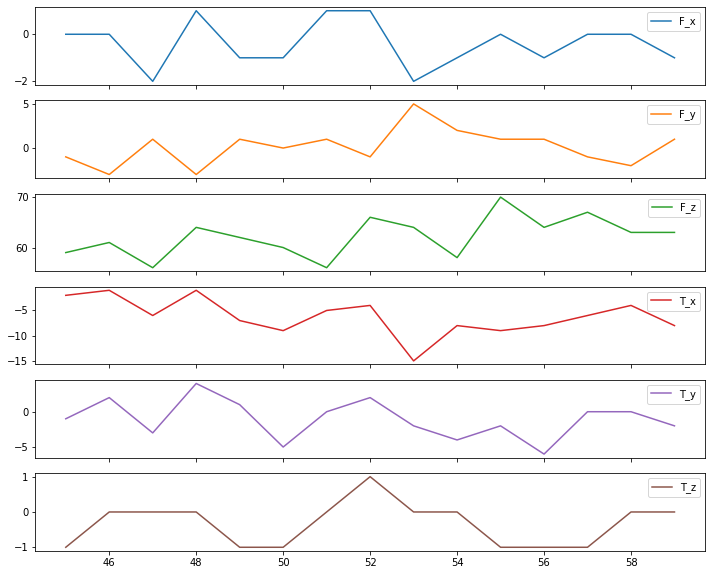

In [14]:
print(y[4])
X[X['id'] == 4][['F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(subplots=True, sharex=True, figsize=(12, 10))
plt.show()

In the above output, we can see the time series for sample id 4 that is not representing any failure. Let’s check for another sample.

False


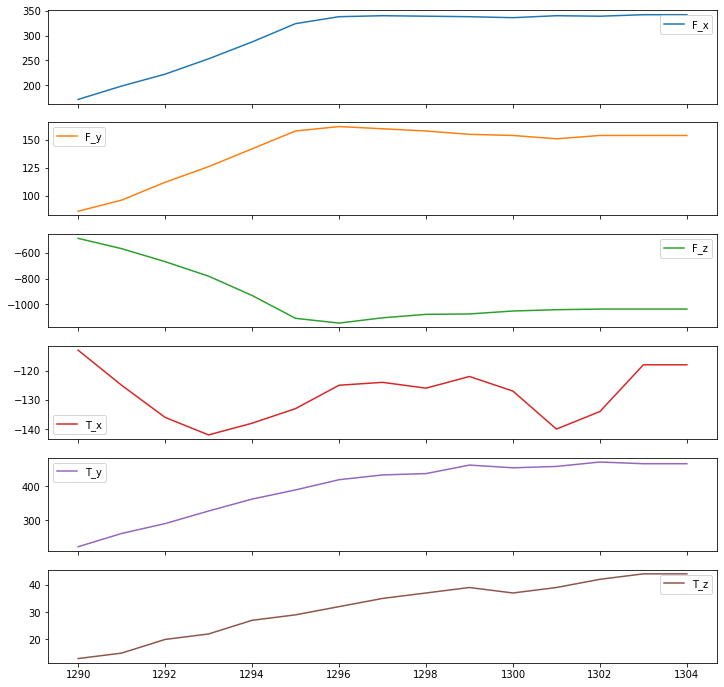

In [22]:
print(f'Is robot has ')
X[X['id'] == 87][['F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(subplots=True, sharex=True, figsize=(12,12))
plt.show()

Here we can see that we have got some failures. Let’s check whether our model can capture these details or not.   

### <font color='darkgreen'>Extracting features</font>

In [10]:
features = extract_features(X, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.56s/it]


Let’s see how many features we have from these different time series.

In [24]:
features

,T_z__variance_larger_than_standard_deviation,T_z__has_duplicate_max,T_z__has_duplicate_min,T_z__has_duplicate,T_z__sum_values,T_z__abs_energy,T_z__mean_abs_change,T_z__mean_change,T_z__mean_second_derivative_central,T_z__median,...,T_y__permutation_entropy__dimension_6__tau_1,T_y__permutation_entropy__dimension_7__tau_1,T_y__query_similarity_count__query_None__threshold_0.0,"T_y__matrix_profile__feature_""min""__threshold_0.98","T_y__matrix_profile__feature_""max""__threshold_0.98","T_y__matrix_profile__feature_""mean""__threshold_0.98","T_y__matrix_profile__feature_""median""__threshold_0.98","T_y__matrix_profile__feature_""25""__threshold_0.98","T_y__matrix_profile__feature_""75""__threshold_0.98",T_y__mean_n_absolute_max__number_of_maxima_7
1,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2,0.0,1.0,1.0,1.0,-4.0,4.0,0.285714,0.000000,0.038462,0.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.285714
3,0.0,1.0,1.0,1.0,-4.0,4.0,0.571429,0.000000,0.038462,0.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.428571
4,0.0,0.0,1.0,1.0,-5.0,7.0,0.500000,0.071429,-0.038462,0.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.714286
5,0.0,1.0,1.0,1.0,-2.0,6.0,0.357143,-0.071429,0.000000,0.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,0.0,0.0,1.0,-232.0,4988.0,3.428571,-1.000000,-0.115385,-21.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.285714
85,1.0,0.0,1.0,1.0,-52.0,250.0,0.500000,-0.500000,0.038462,-2.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.428571
86,1.0,0.0,1.0,1.0,-81.0,885.0,1.785714,1.071429,0.269231,-8.0,...,0.325083,0.348832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.857143
87,1.0,1.0,0.0,1.0,475.0,16513.0,2.500000,2.214286,-0.076923,35.0,...,1.497866,1.581094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,459.142857


Here we can see 88 rows and 4734 columns in extracted features. There can be many non-values in extracted features that can be removed using the following lines of codes.

In [30]:
imputed_features = impute(features)
imputed_features.head(n=10)

,T_z__variance_larger_than_standard_deviation,T_z__has_duplicate_max,T_z__has_duplicate_min,T_z__has_duplicate,T_z__sum_values,T_z__abs_energy,T_z__mean_abs_change,T_z__mean_change,T_z__mean_second_derivative_central,T_z__median,...,T_y__permutation_entropy__dimension_6__tau_1,T_y__permutation_entropy__dimension_7__tau_1,T_y__query_similarity_count__query_None__threshold_0.0,"T_y__matrix_profile__feature_""min""__threshold_0.98","T_y__matrix_profile__feature_""max""__threshold_0.98","T_y__matrix_profile__feature_""mean""__threshold_0.98","T_y__matrix_profile__feature_""median""__threshold_0.98","T_y__matrix_profile__feature_""25""__threshold_0.98","T_y__matrix_profile__feature_""75""__threshold_0.98",T_y__mean_n_absolute_max__number_of_maxima_7
1,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
2,0.0,1.0,1.0,1.0,-4.0,4.0,0.285714,0.000000,0.038462,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.285714
3,0.0,1.0,1.0,1.0,-4.0,4.0,0.571429,0.000000,0.038462,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.428571
4,0.0,0.0,1.0,1.0,-5.0,7.0,0.500000,0.071429,-0.038462,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.714286
5,0.0,1.0,1.0,1.0,-2.0,6.0,0.357143,-0.071429,0.000000,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.428571
6,0.0,0.0,1.0,1.0,-3.0,5.0,0.642857,-0.071429,0.000000,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
7,0.0,0.0,1.0,1.0,-1.0,3.0,0.428571,0.000000,0.000000,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
8,1.0,0.0,1.0,1.0,0.0,16.0,0.785714,-0.071429,0.038462,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
9,1.0,0.0,1.0,1.0,3.0,17.0,1.000000,0.285714,0.076923,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.857143
10,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,2.163956,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.142857


Now we can select relevant features using the following lines of codes.

In [28]:
filtered_features = select_features(features, y)
filtered_features

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.222222,...,-0.310265,-0.751682,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,2.250926,76.0,3.000000,4.222222,...,-0.202951,0.057818,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,1.632993,40.0,2.142857,3.128889,...,0.539121,0.912474,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,2.000000,60.0,2.428571,7.128889,...,-2.641390,-0.609735,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,1.751190,46.0,2.285714,4.160000,...,0.591927,0.072771,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,53.404120,42780.0,71.428571,1563.528889,...,38.559593,71.641254,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,10.076375,1523.0,12.142857,14.755556,...,14.429645,16.349699,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,37.473546,21064.0,47.714286,2788.595556,...,60.760842,71.095480,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,143.447551,308658.0,157.285714,6415.715556,...,109.029954,173.699573,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2


In the above output, we can see that there are only 682 columns presented after the filtration of the features. Here we have performed two things with the data: first, we extracted the features from the data and second, we have filtered the extracted features. 

<b>Now we can compare the results of any model from <a href='https://scikit-learn.org/stable/'>sklearn</a> using the data with all features and the data with filtered features. Let’s split the data into tests and train.</b>

In [51]:
# Shuffle the features & labels together
idx = np.random.permutation(features.index)
features.reindex(idx)
y.reindex(idx)

83    False
6      True
64    False
62    False
77    False
      ...  
82    False
57    False
15     True
28    False
14     True
Length: 88, dtype: bool

In [57]:
X_feature_train, X_feature_test, y_train, y_test = train_test_split(features, y, test_size=.4)
X_filtered_train, X_filtered_test = X_feature_train[filtered_features.columns], X_feature_test[filtered_features.columns]

In [58]:
X_feature_train.shape

(52, 4734)

In [59]:
X_filtered_train.shape

(52, 682)

Let’s fit the data with all the features in a decision tree model.

In [60]:
classifier_feature = DecisionTreeClassifier()
classifier_feature.fit(X_feature_train, y_train)
print(classification_report(y_test, classifier_feature.predict(X_feature_test)))

              precision    recall  f1-score   support

       False       1.00      0.93      0.96        27
        True       0.82      1.00      0.90         9

    accuracy                           0.94        36
   macro avg       0.91      0.96      0.93        36
weighted avg       0.95      0.94      0.95        36



Here we have got some good results with all the features. Let’s check a model using data that has been filtered.

In [61]:
classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        27
        True       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.94      0.96        36
weighted avg       0.97      0.97      0.97        36



Here we can see that a similar model has improved its performance with the filtered model.

## <font color='darkblue'>Final words</font>
Here in this article, we have discussed feature engineering in time series. Along with that, we have discussed a python package named <b><a href='https://tsfresh.readthedocs.io/en/latest/'>tsfresh</a></b>, that can be used in feature engineering of time series. Using some of the modules we have performed feature engineering and after feature engineering, we find some improvements in the model performance.